In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

In [2]:
# A 

#Not sure how this is going to be tested on another machine.
df = pd.read_csv('//Users//george//Desktop//fall 2019//datascience//homework//label.csv')

df



,name of the file,digit label
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


In [3]:
#B

imagePixel = []
feature_cols = []

for x in range(df.shape[0]):
    imagePath = Image.open('//Users//george//Desktop//fall 2019//datascience//homework//Digit//' + str(x) + '.jpg',  'r')
    pixelValue = list(imagePath.getdata())
    imagePixel.append(pixelValue)
    
for x in range(64):
    feature_cols.append(x)

pixels = []

for i in range(64):
    pixels.append("Number of Pixels" + str(i))

z = pd.DataFrame(imagePixel)

pixelsTable = pd.DataFrame(imagePixel, columns=pixels)
pixelsTable
   
X = pixelsTable[pixels]

# select a Series of labels (the last column) from the DataFrame
y = df['digit label']

In [4]:
pixelsTable

,Number of Pixels0,Number of Pixels1,Number of Pixels2,Number of Pixels3,Number of Pixels4,Number of Pixels5,Number of Pixels6,Number of Pixels7,Number of Pixels8,Number of Pixels9,...,Number of Pixels54,Number of Pixels55,Number of Pixels56,Number of Pixels57,Number of Pixels58,Number of Pixels59,Number of Pixels60,Number of Pixels61,Number of Pixels62,Number of Pixels63
0,0,2,88,217,158,21,0,0,16,0,...,4,0,4,3,87,228,182,0,9,2
1,0,0,11,187,210,78,5,0,13,5,...,0,0,0,0,0,172,251,157,0,12
2,0,0,5,59,240,199,2,0,5,0,...,92,0,0,11,0,54,173,255,138,0
3,6,0,108,255,213,13,10,0,2,131,...,168,1,0,0,118,217,226,159,0,3
4,0,6,0,34,160,7,7,0,5,0,...,7,0,0,0,2,42,250,51,0,4
5,15,0,200,149,2,0,13,0,0,11,...,69,0,7,0,143,255,255,150,7,0
6,0,13,0,192,210,0,10,0,8,0,...,134,3,0,0,11,145,248,174,46,0
7,10,0,114,133,203,255,235,16,0,13,...,0,0,1,0,225,66,11,0,0,11
8,0,7,145,223,128,13,0,2,0,0,...,133,0,0,3,169,249,245,163,26,1
9,0,0,174,199,5,0,0,8,10,23,...,90,1,0,3,145,182,217,55,0,2


In [5]:
#C

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)


In [6]:
#D

my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)
my_RandomForest.fit(X_train, y_train)
y_predict = my_RandomForest.predict(X_test)

score = accuracy_score(y_test, y_predict)
print(score)


0.9588235294117647


In [7]:
#E

index1 = np.where(y_test != y_predict)[0]
indexImage = []
xtestSize = X_test.index
for i in range(len(index1)):
    mainIndex = index1[i]
    indexImage.append(xtestSize[mainIndex])
    
print(indexImage)

[27, 890, 1660, 1095, 103, 69, 1690]


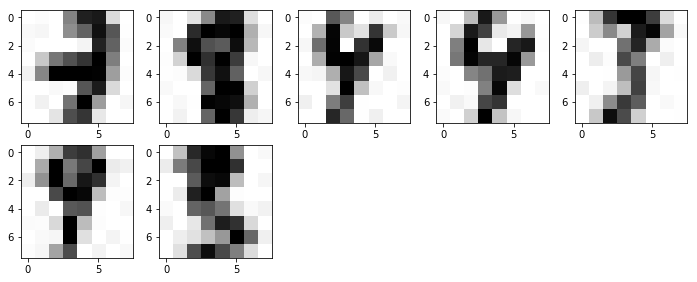

In [8]:
singlePixel = plt.figure(figsize=(12, 12))
row = 5
col = 5

for i in range(1, len(indexImage)+1):
    filePath = '//Users//george//Desktop//fall 2019//datascience//homework//Digit//' + str(indexImage[i-1]) + '.jpg'
    imageReader = mpimg.imread(filePath, 'jpg')
    
    singlePixel.add_subplot(row, col, i)
    plt.imshow(imageReader, cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()
